In [1]:
from jupyterthemes import jtplot

jtplot.style(theme='onedork')
jtplot.style(ticks=True, grid=False)

import numpy as np

np.random.seed(42)

%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X = mnist["data"]
y = mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

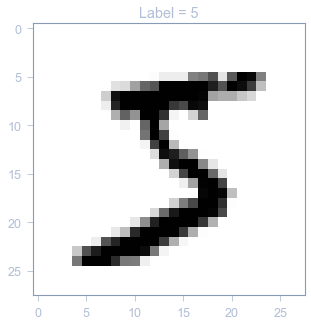

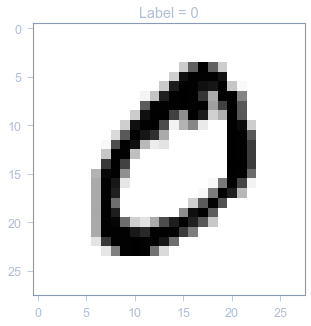

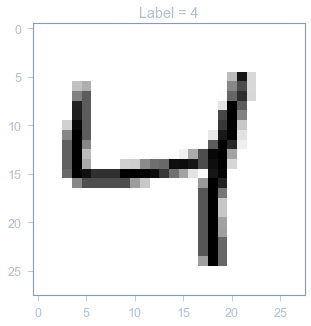

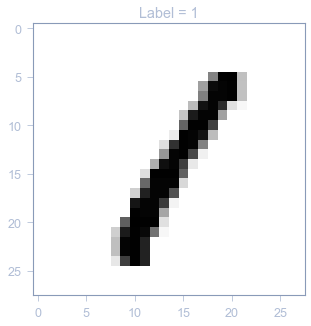

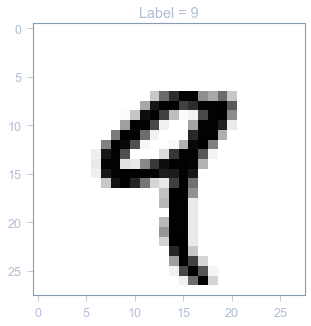

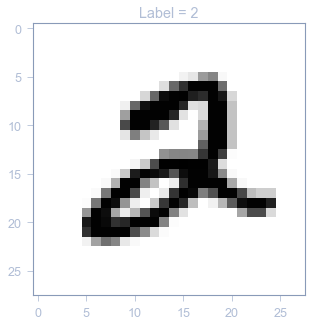

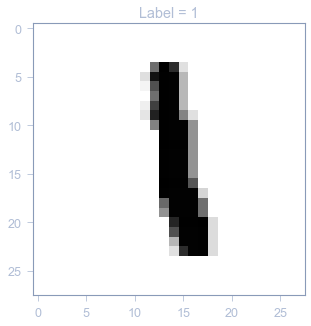

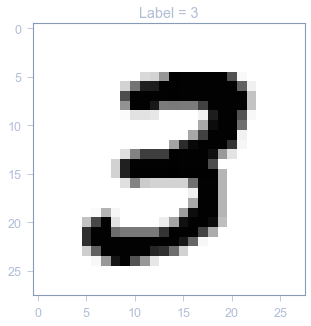

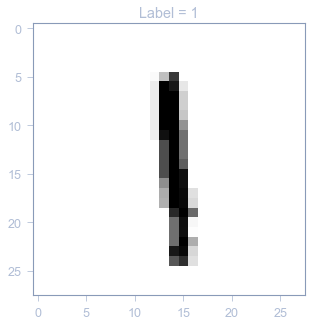

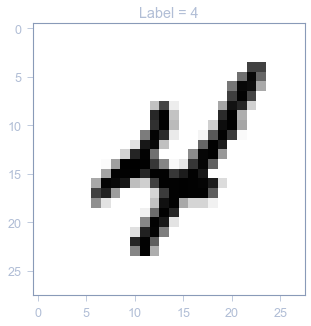

In [5]:
for i in range(10):
    plt.imshow(X[i].reshape(28, 28), cmap='binary')
    plt.title("Label = " + y[i])
    plt.show()

In [6]:
numbersCounter = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
for i in range(len(y)):
    if int(y[i]) in numbersCounter:
        numbersCounter[int(y[i])] += 1

numbersCounter

{0: 6903,
 1: 7877,
 2: 6990,
 3: 7141,
 4: 6824,
 5: 6313,
 6: 6876,
 7: 7293,
 8: 6825,
 9: 6958}

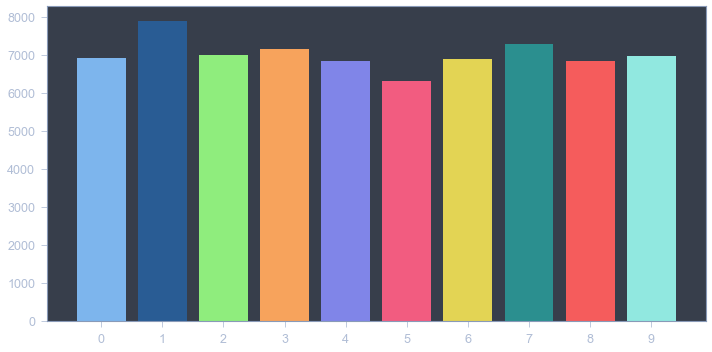

In [7]:
colors = [(0.49, 0.71, 0.93), (0.16,0.36,0.58), (0.56, 0.93, 0.49), (0.97, 0.64, 0.36), (0.50, 0.52, 0.91), (0.95, 0.36, 0.50), (0.89, 0.83, 0.33), (0.17, 0.56, 0.56), (0.96, 0.36, 0.36), (0.57, 0.91, 0.88)]
plt.bar(numbersCounter.keys(), numbersCounter.values(), color=colors)
plt.xticks(np.arange(len(numbersCounter)))
plt.tight_layout()
plt.show()

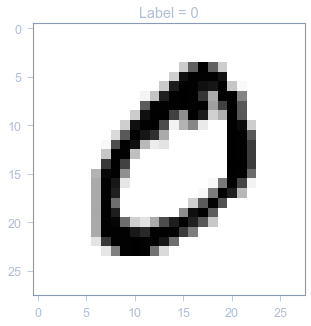

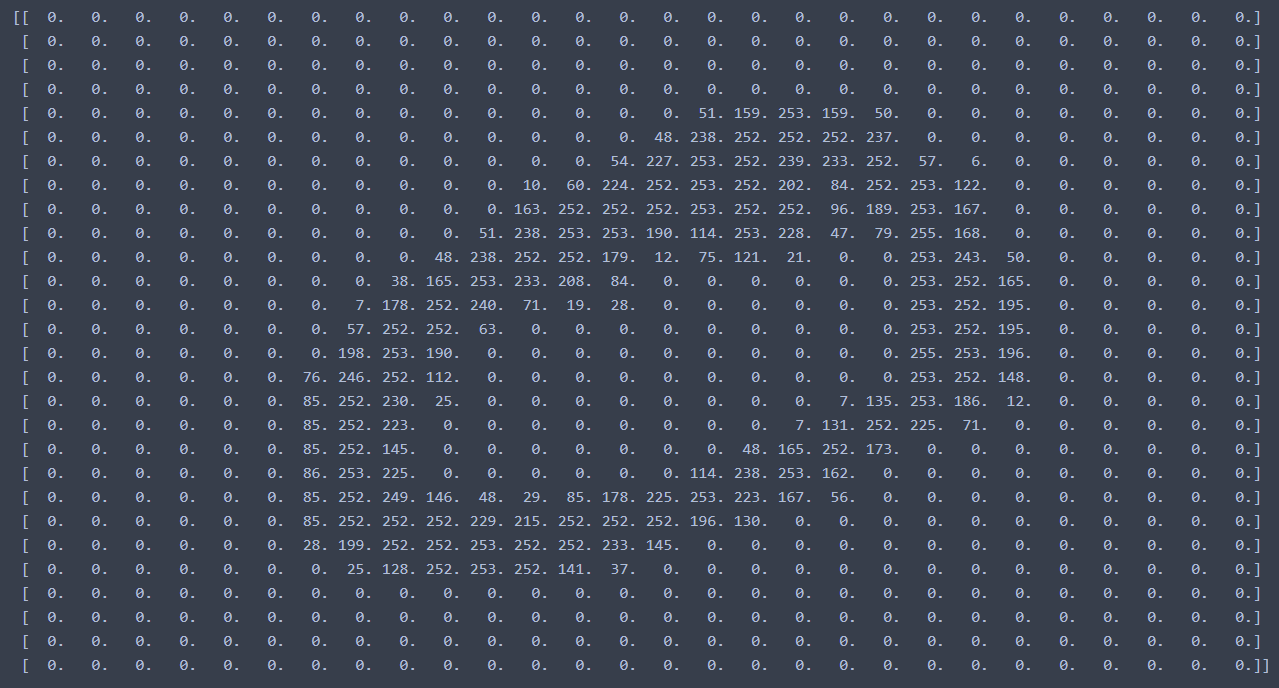

In [8]:
from IPython.display import HTML, display
from IPython.display import Image

digit = X[1]
digitImage = digit.reshape(28, 28)
plt.imshow(digitImage, cmap='binary')
plt.title("Label = " + str(y[1]))
plt.show()
Image(filename='images/mnist-number.png')

In [9]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [10]:
y = y.astype(dtype=int)
y

array([5, 0, 4, ..., 4, 5, 6])

In [11]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [12]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier(weights='distance', n_neighbors=3)
kn_clf.fit(X_train, y_train)
kn_clf.predict([digit])

array([0])

In [13]:
y_knn_pred = kn_clf.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_knn_pred)
cm

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [   9,    7,  997,    2,    0,    0,    1,   14,    2,    0],
       [   0,    1,    4,  975,    1,   13,    1,    7,    4,    4],
       [   0,    5,    0,    0,  948,    0,    5,    4,    1,   19],
       [   4,    1,    0,   12,    2,  860,    5,    1,    3,    4],
       [   4,    3,    0,    0,    4,    3,  944,    0,    0,    0],
       [   0,   18,    4,    0,    2,    0,    0,  994,    0,   10],
       [   7,    0,    3,   13,    5,   11,    3,    4,  923,    5],
       [   3,    4,    2,    7,    9,    4,    1,    8,    2,  969]],
      dtype=int64)

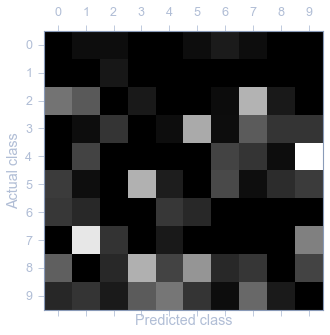

In [15]:
rowSums = cm.sum(axis=1, keepdims=True)
ncm = cm / rowSums
np.fill_diagonal(ncm, 0)
plt.matshow(ncm, cmap="gray")
plt.xlabel("Predicted class")
plt.xticks(np.arange(len(ncm)))
plt.ylabel("Actual class")
plt.yticks(np.arange(len(ncm)))
plt.show()

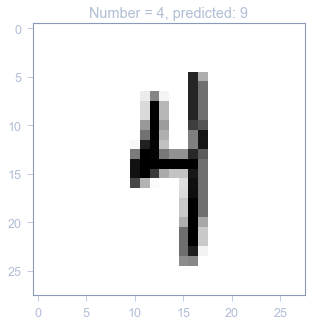

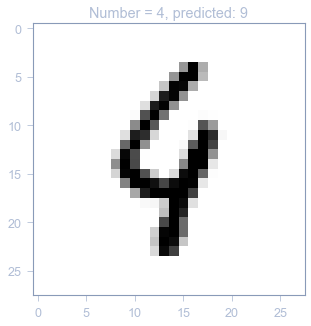

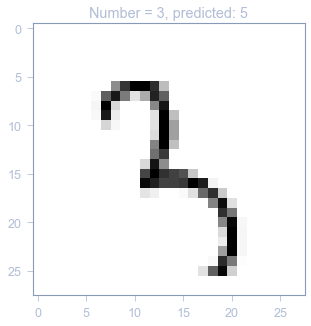

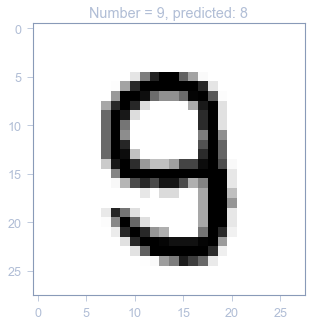

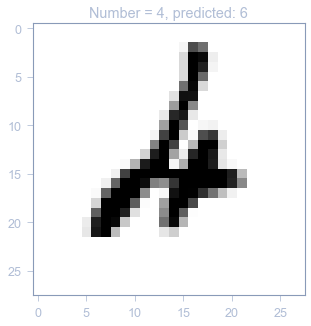

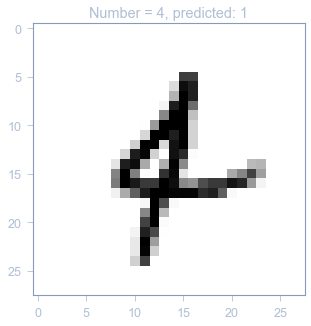

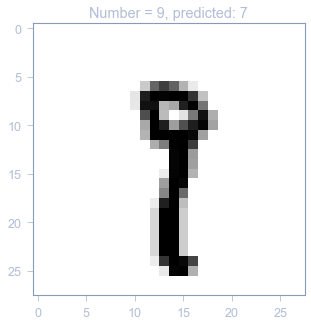

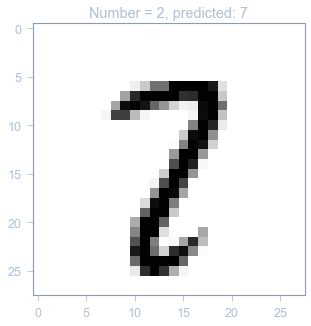

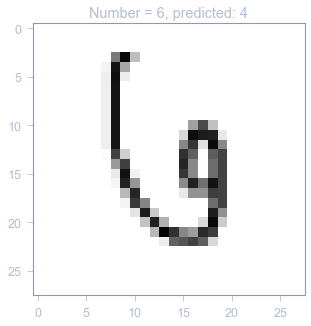

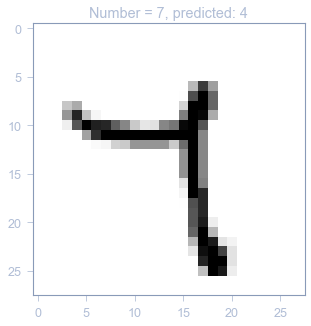

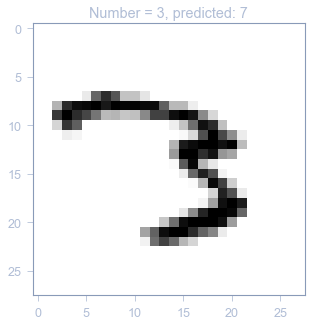

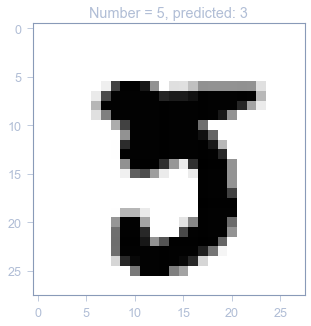

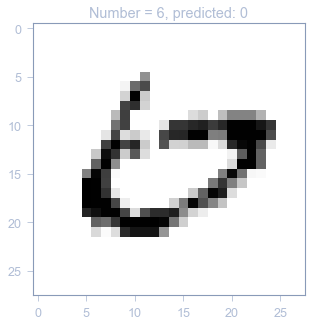

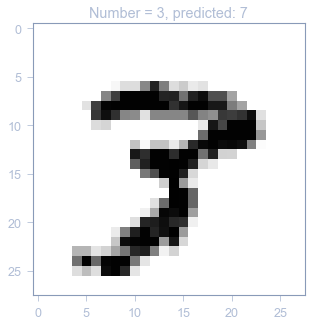

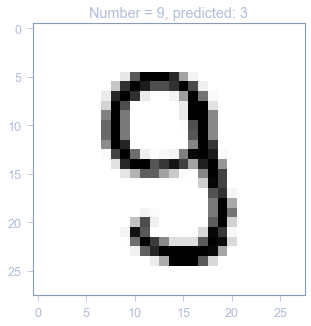

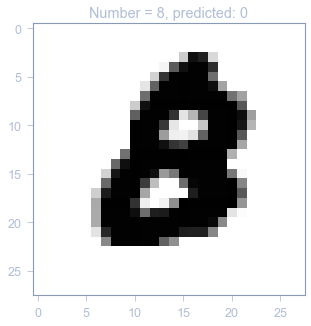

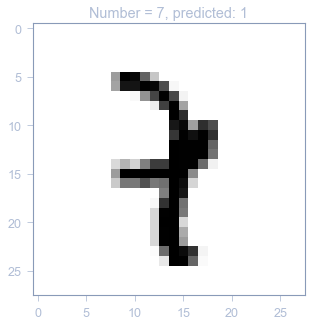

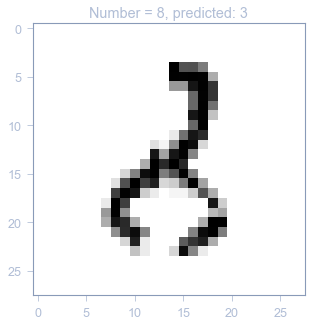

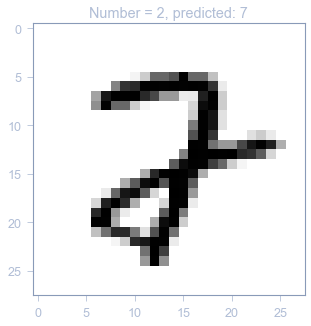

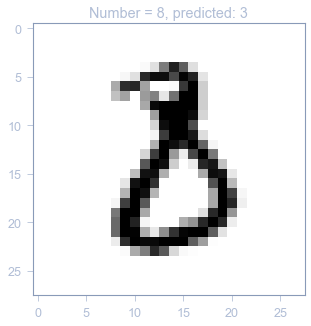

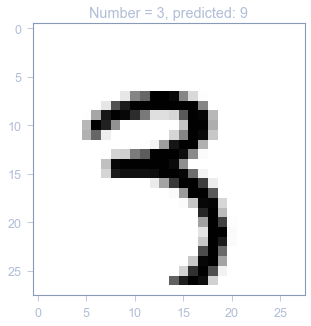

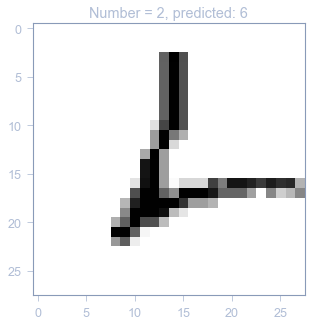

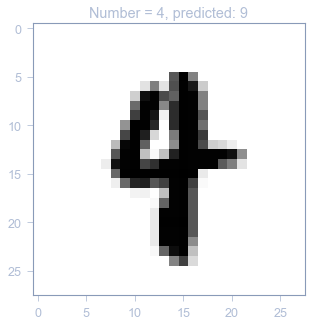

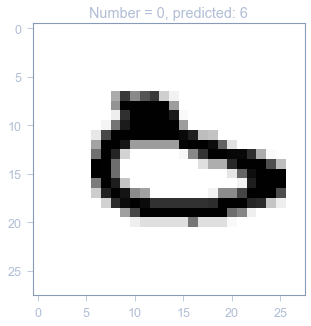

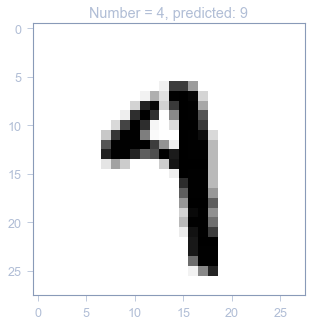

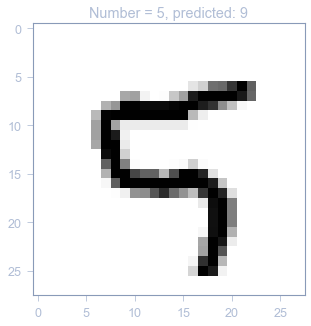

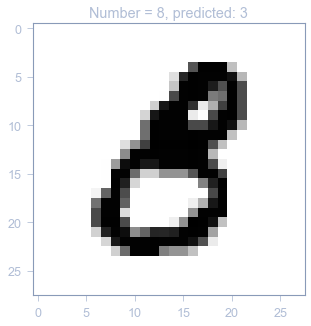

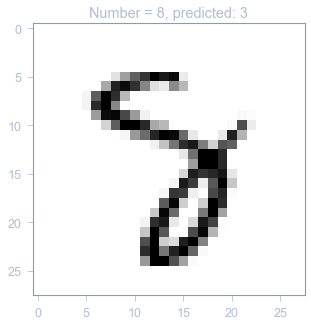

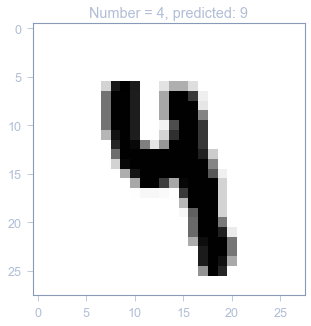

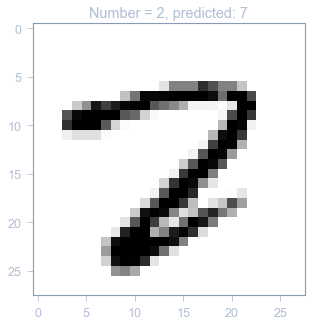

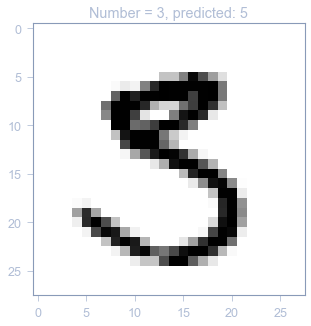

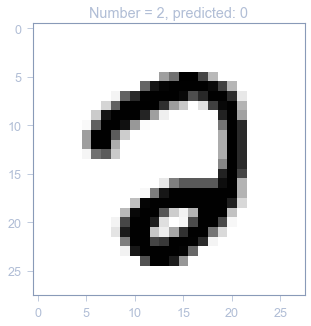

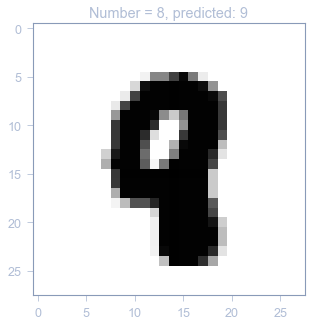

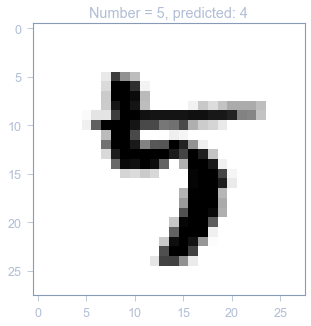

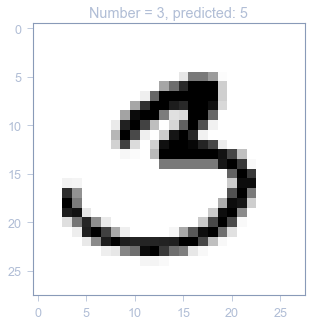

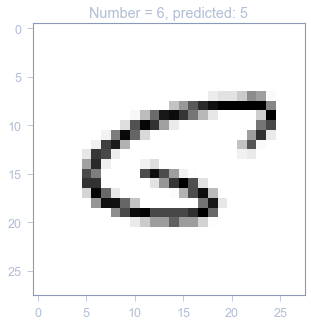

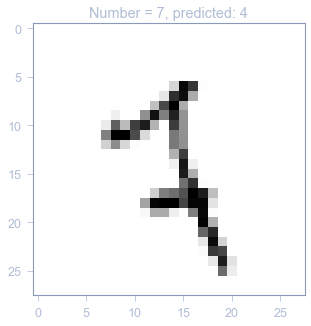

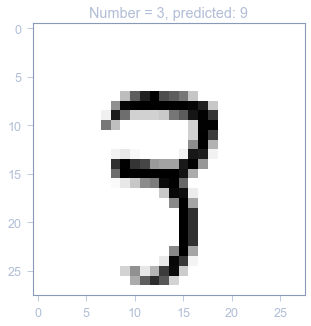

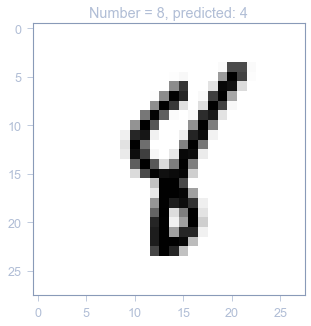

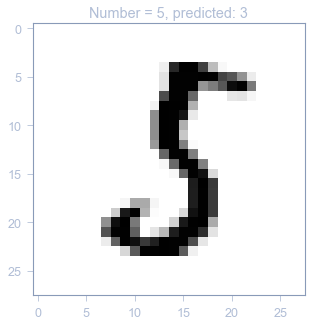

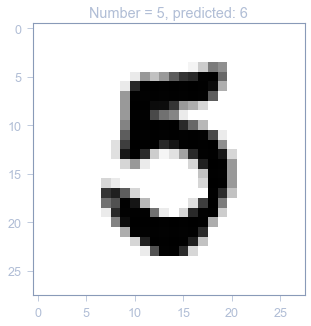

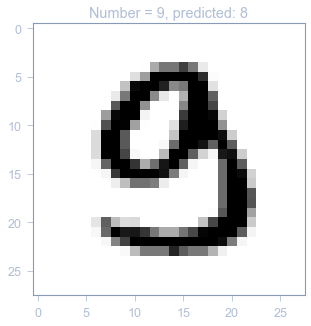

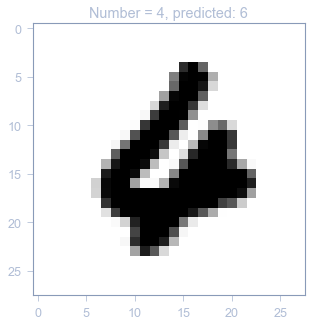

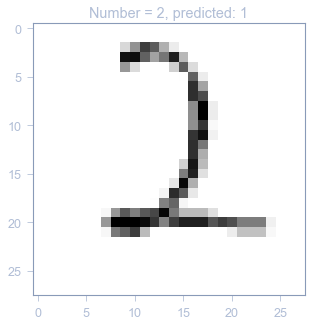

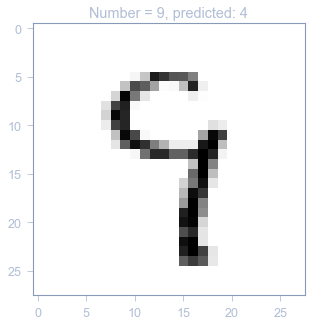

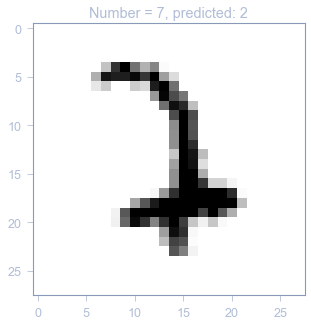

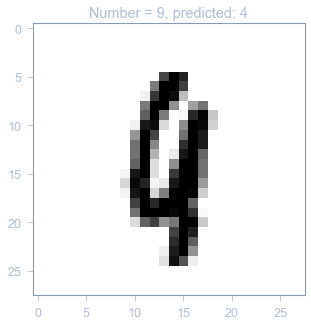

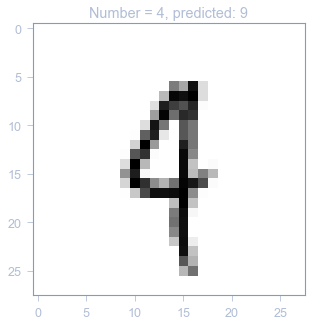

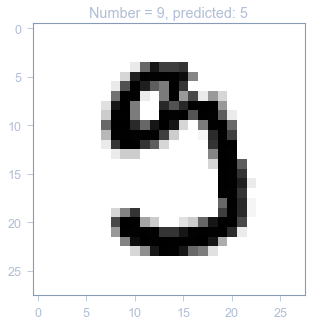

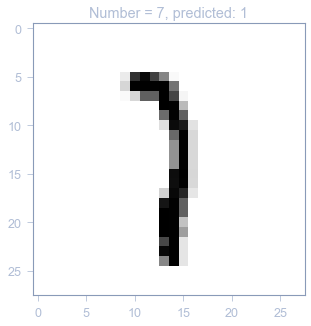

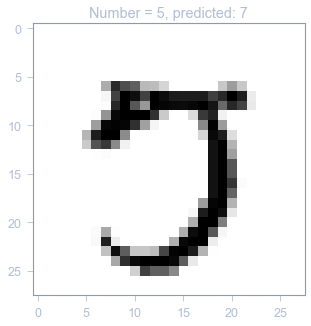

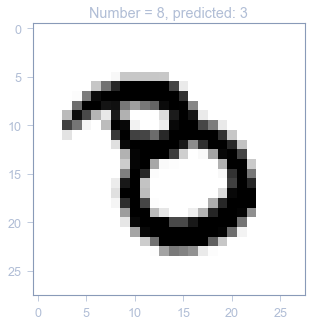

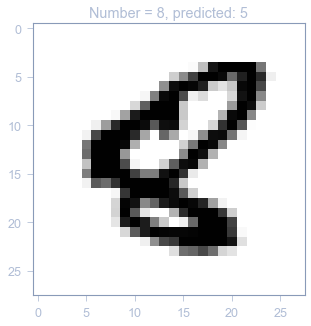

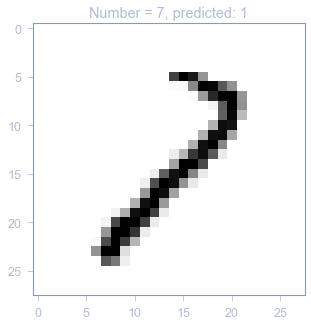

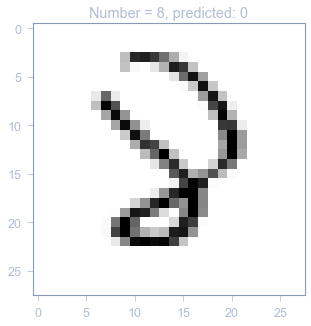

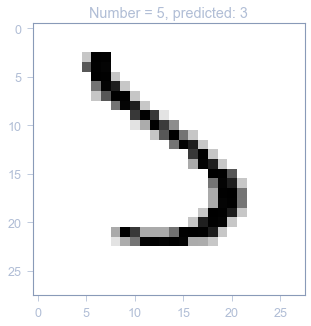

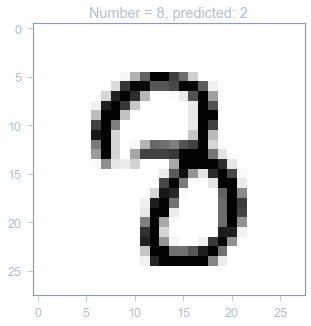

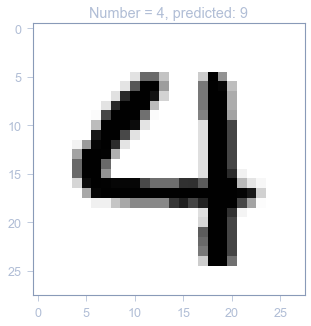

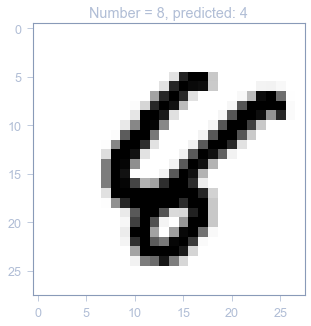

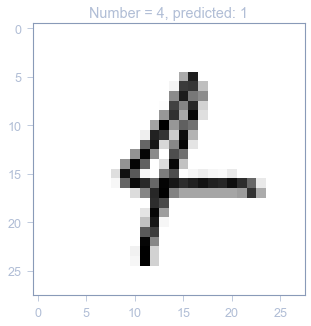

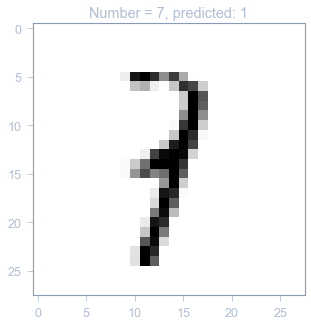

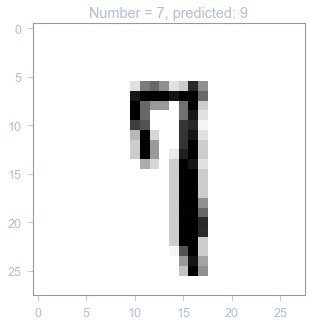

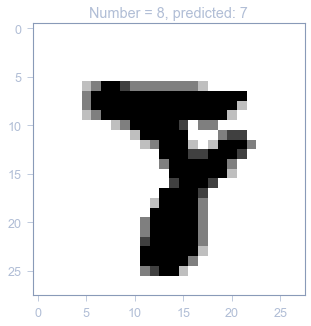

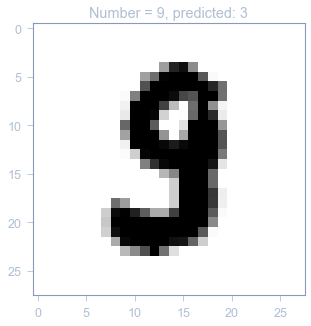

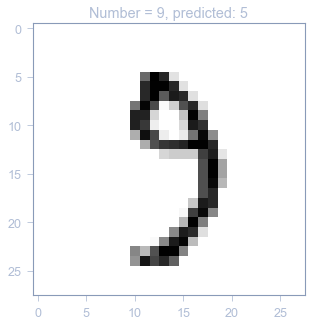

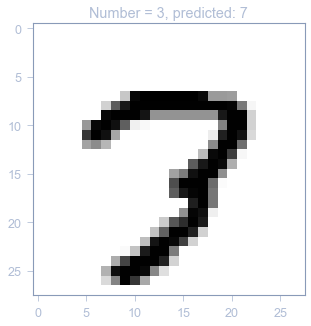

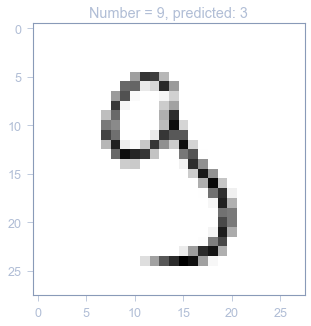

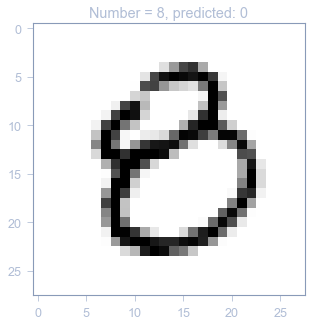

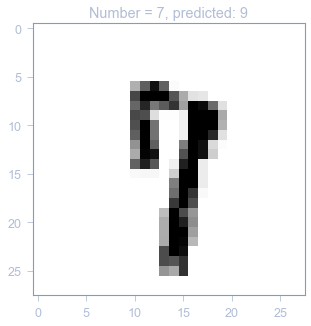

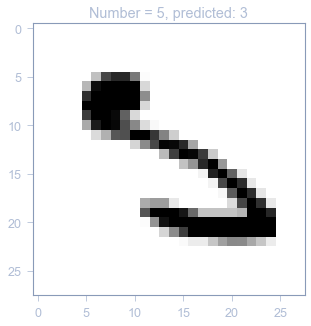

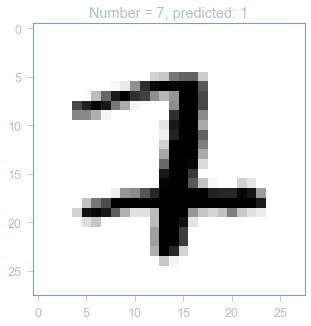

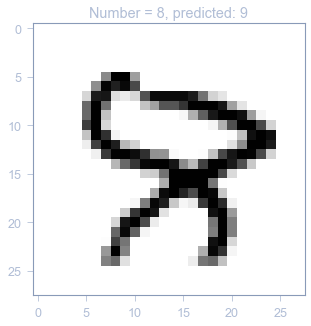

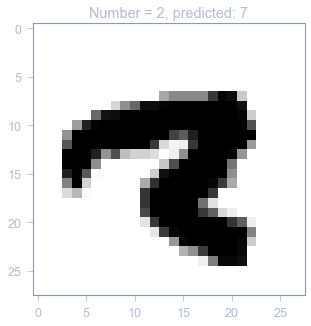

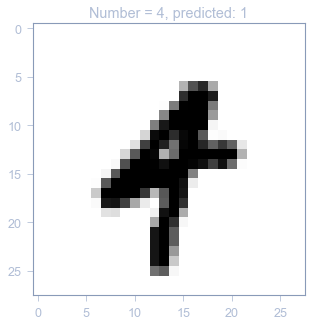

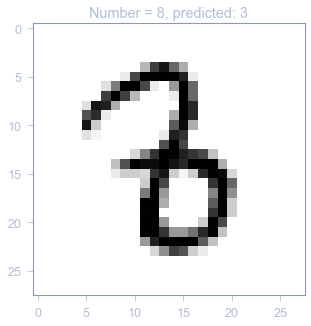

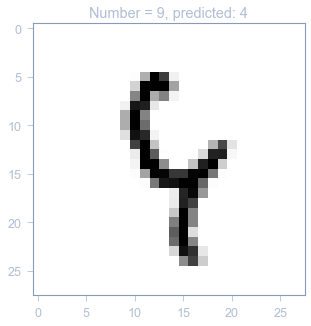

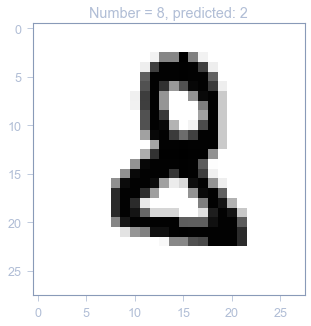

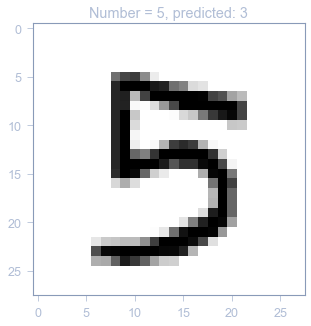

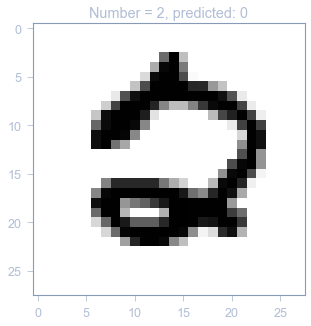

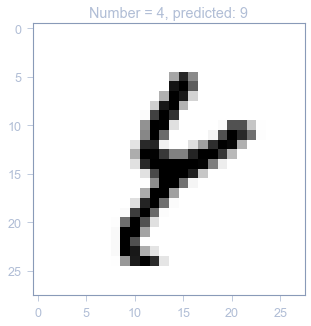

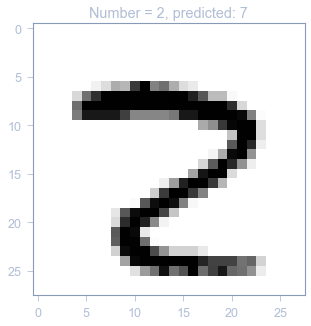

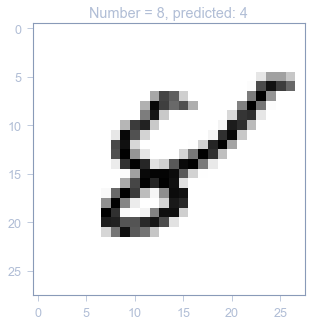

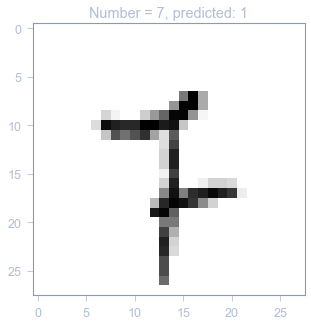

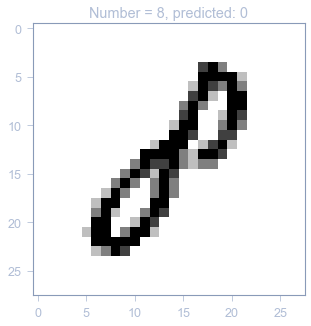

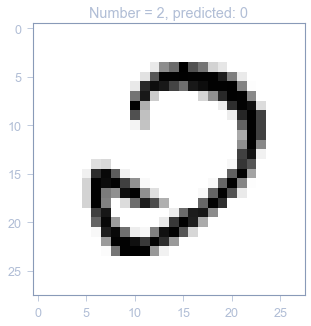

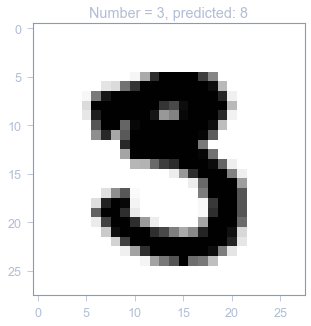

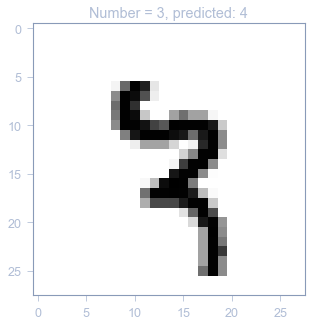

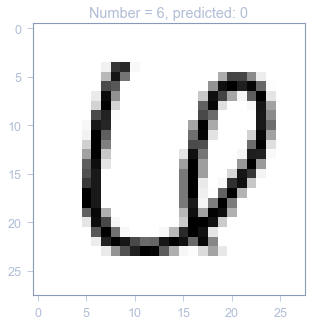

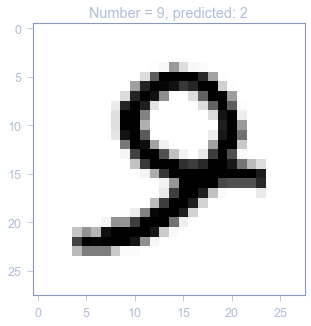

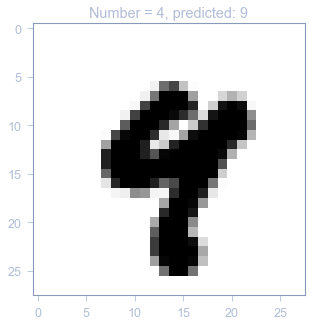

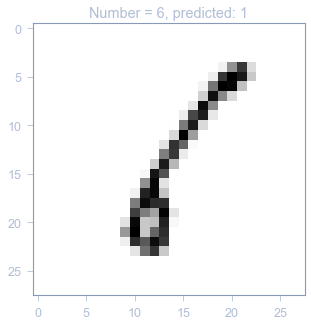

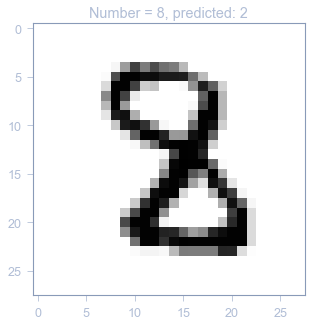

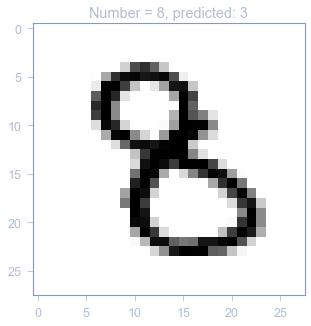

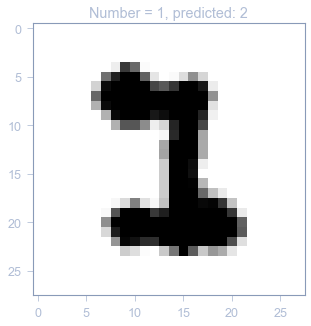

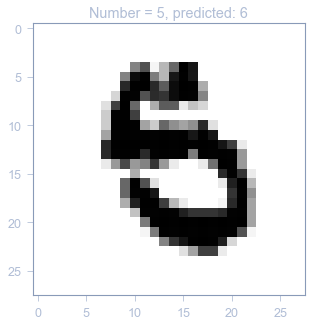

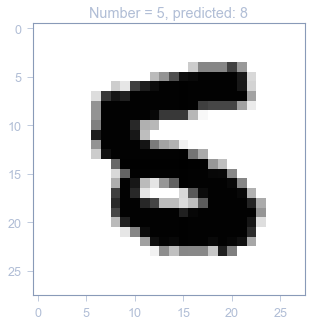

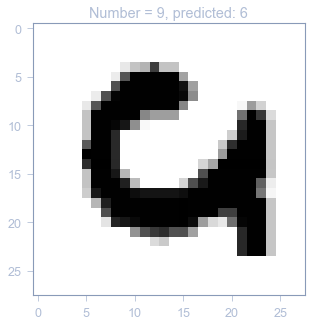

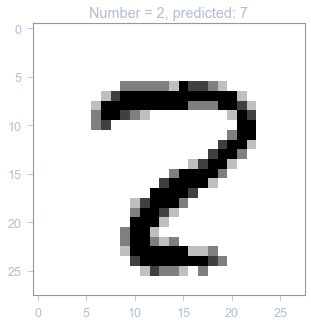

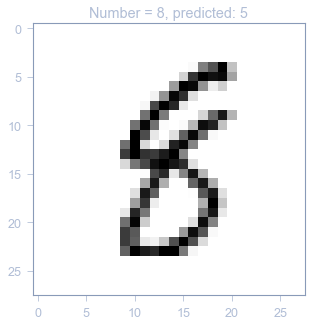

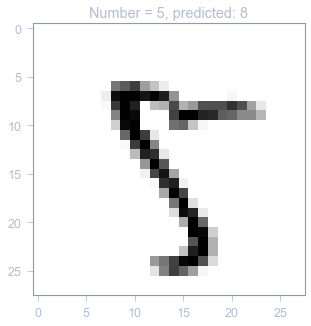

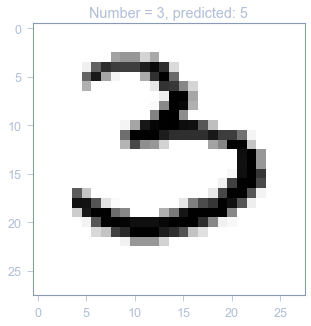

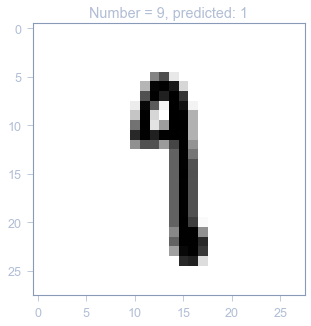

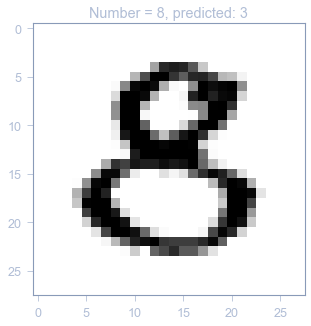

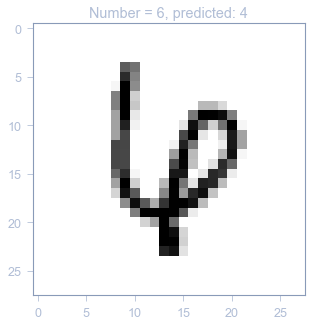

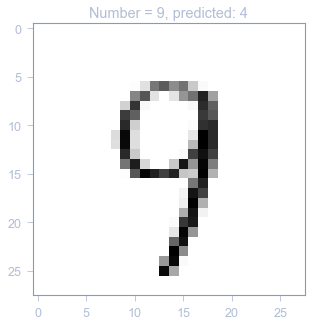

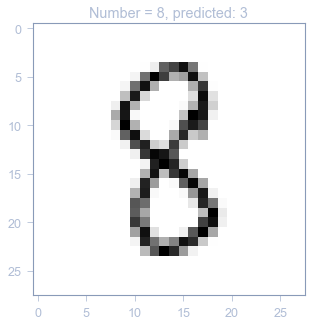

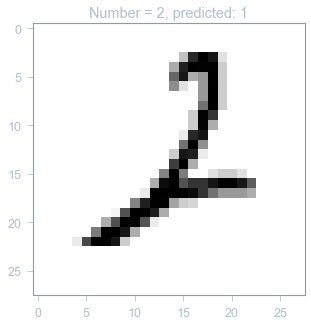

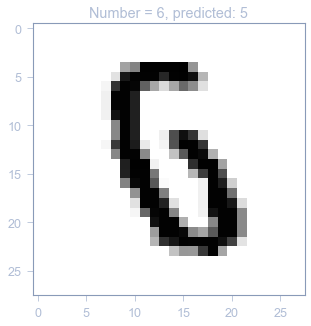

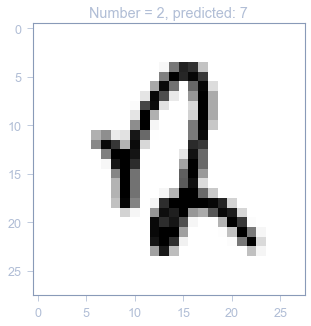

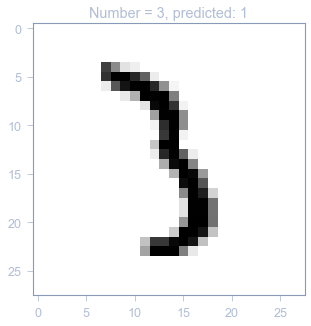

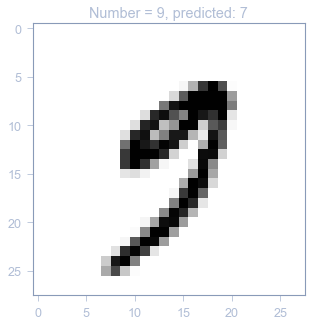

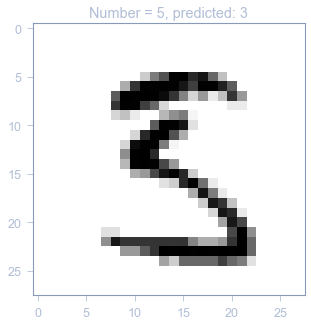

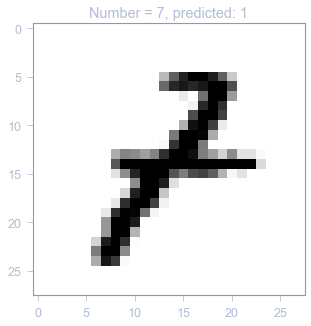

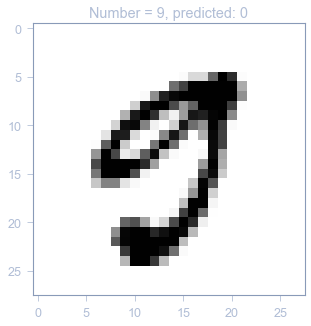

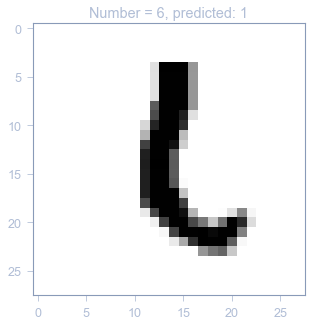

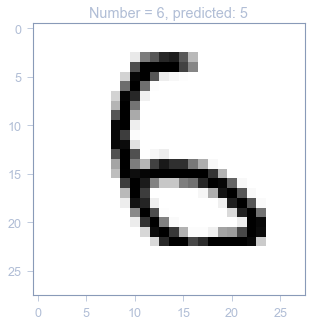

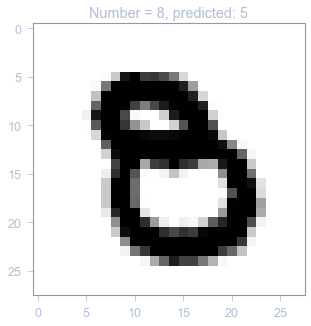

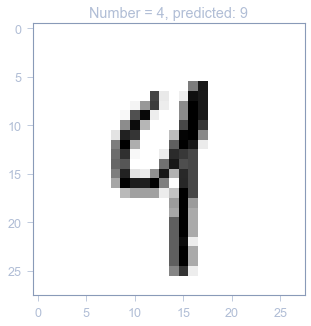

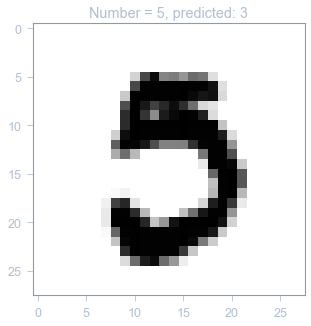

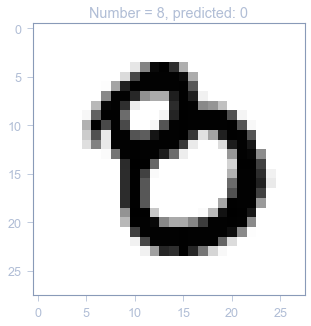

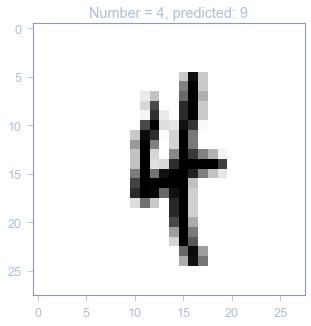

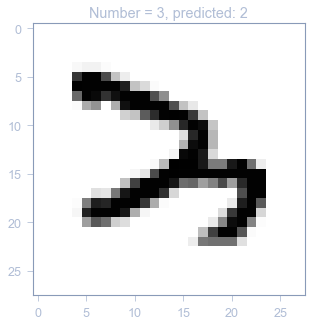

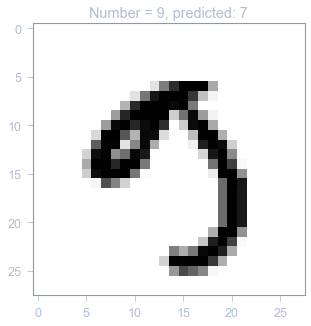

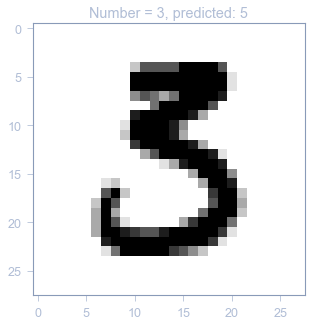

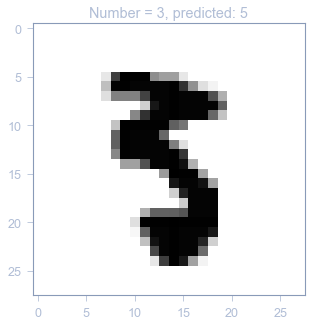

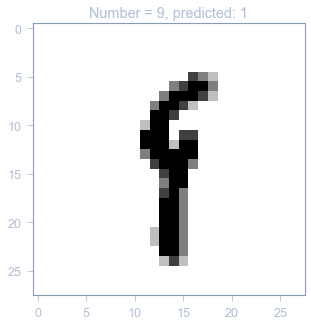

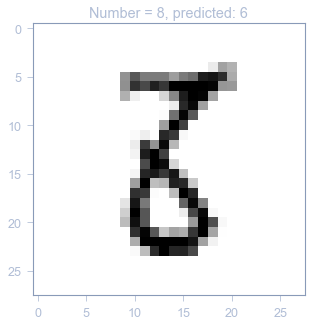

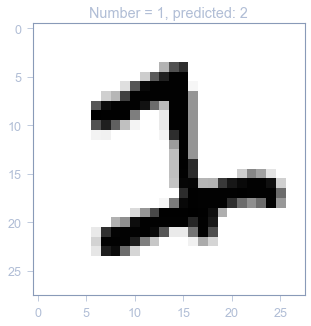

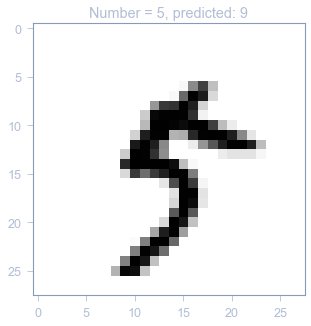

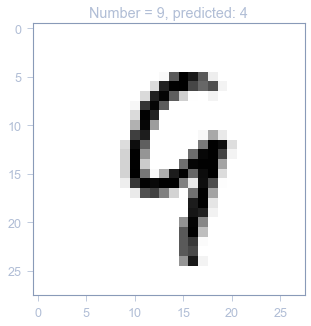

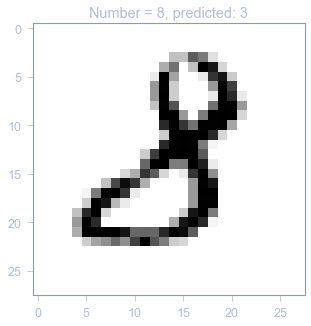

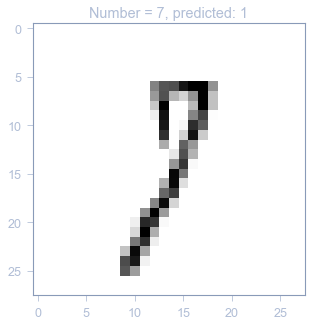

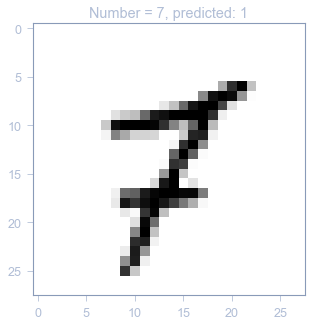

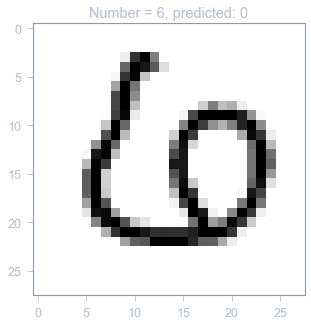

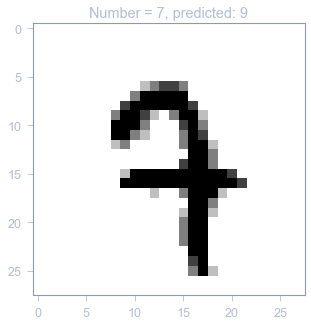

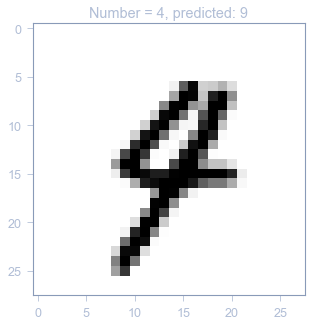

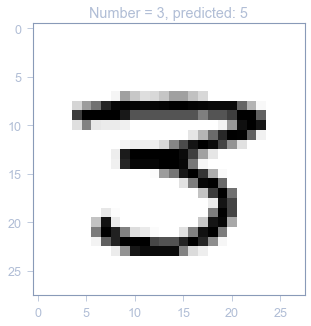

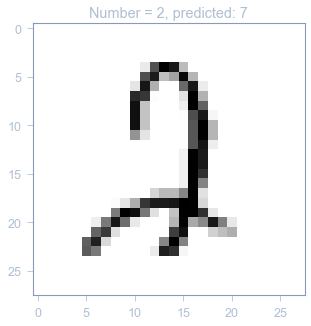

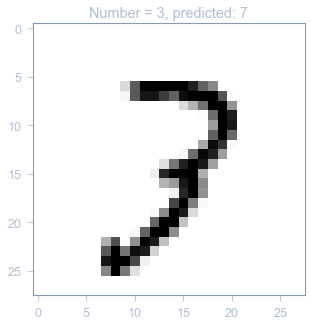

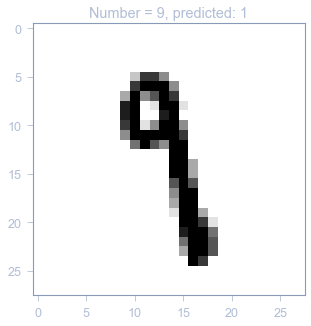

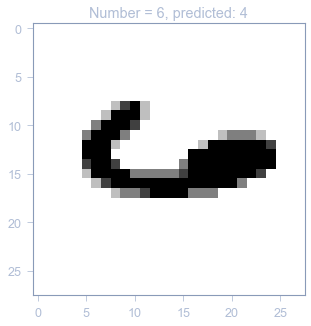

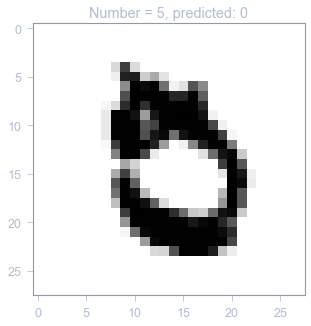

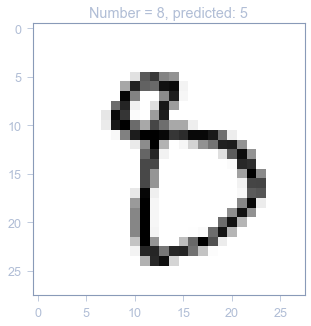

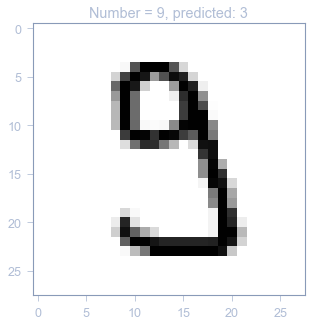

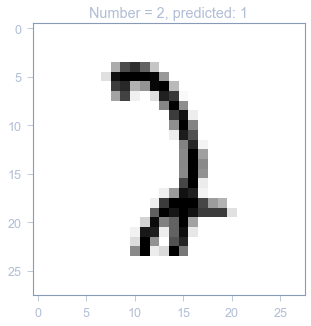

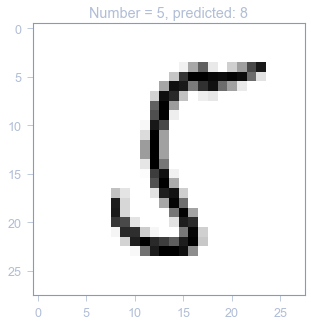

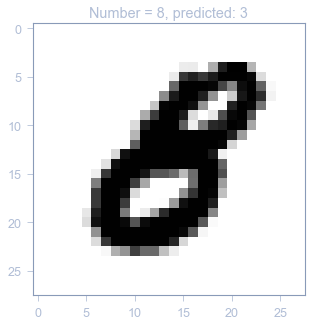

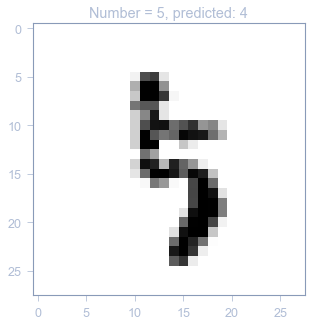

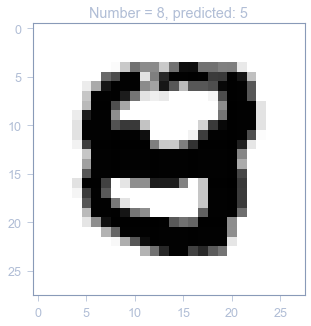

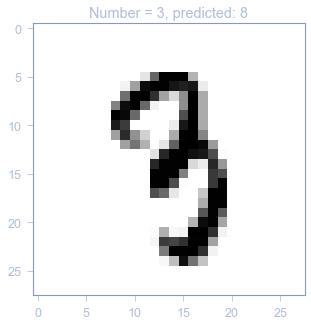

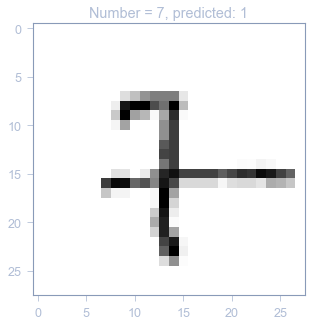

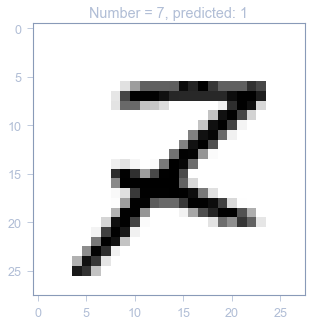

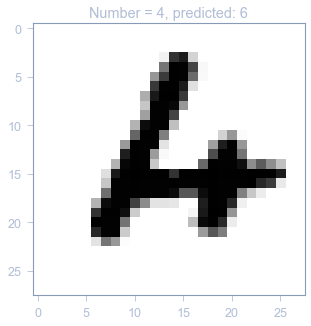

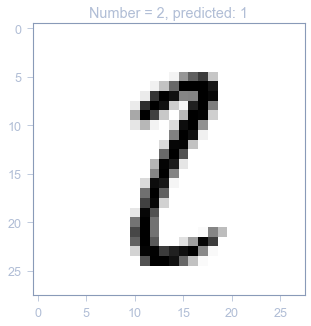

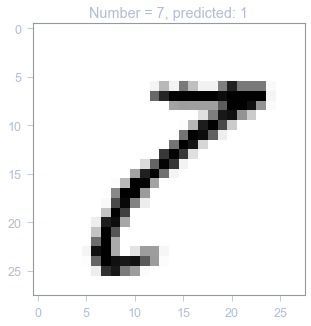

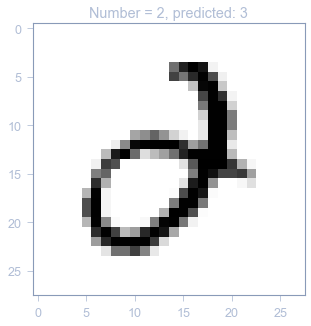

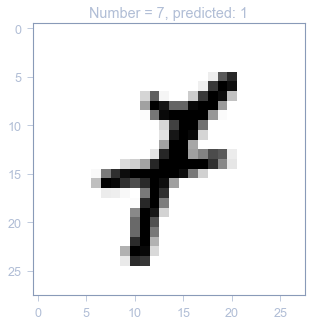

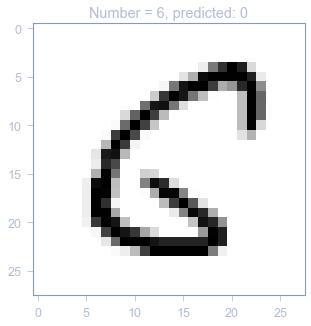

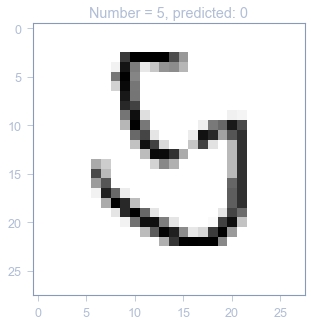

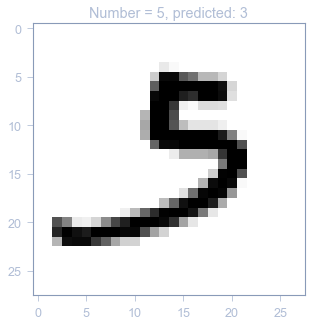

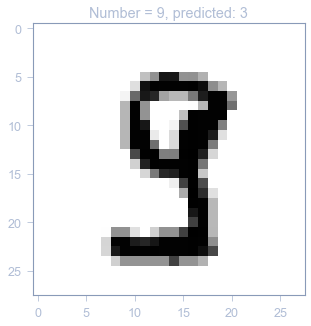

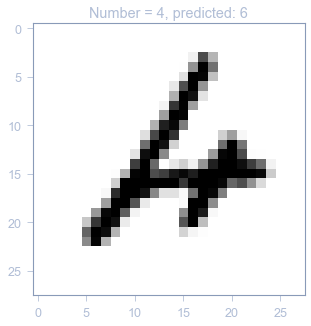

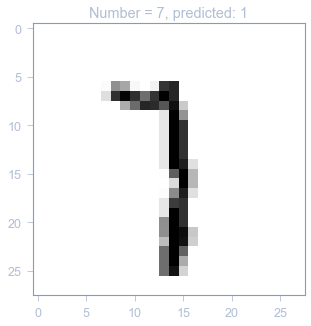

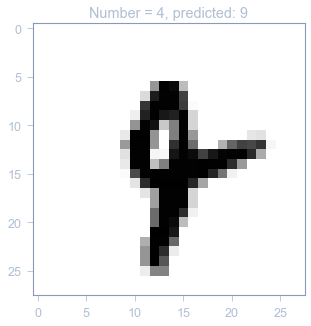

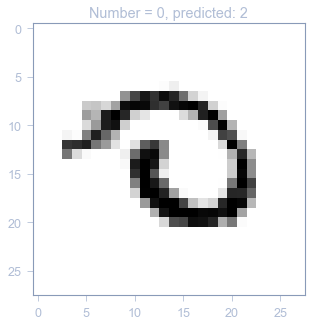

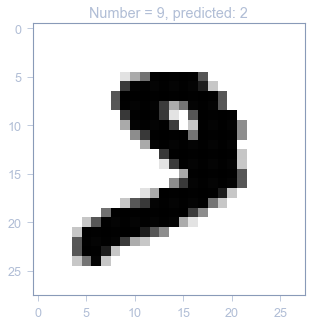

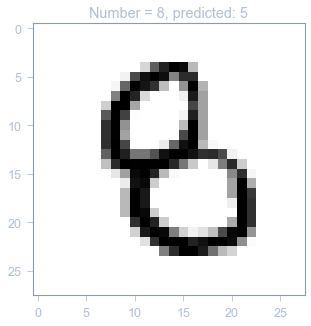

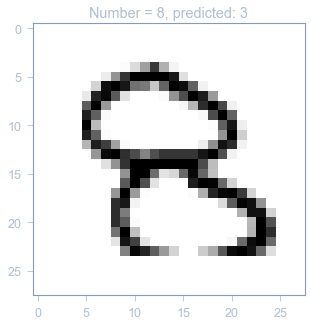

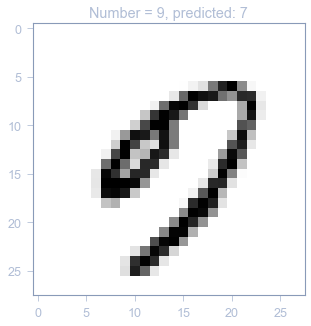

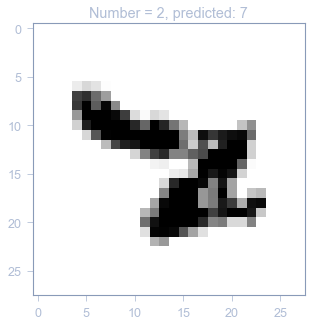

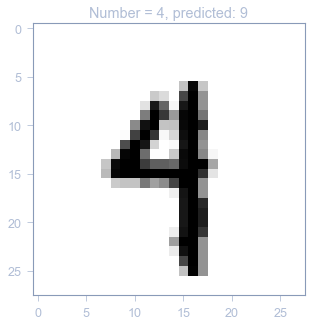

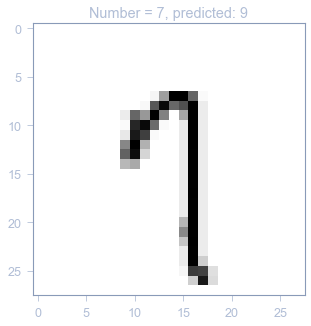

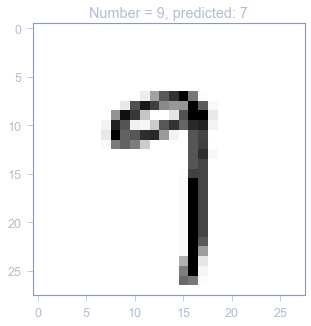

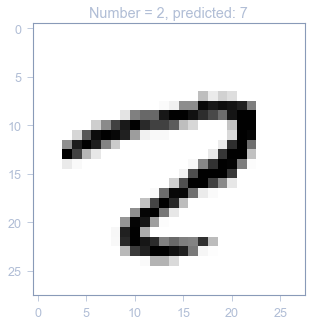

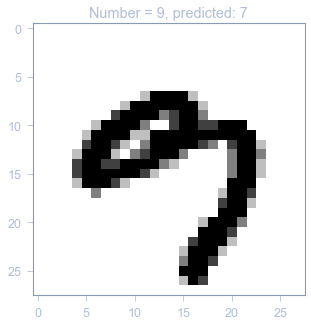

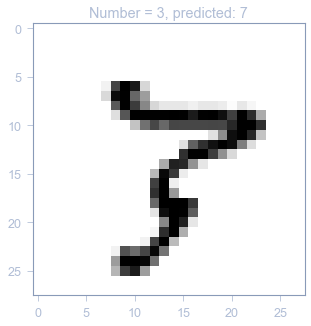

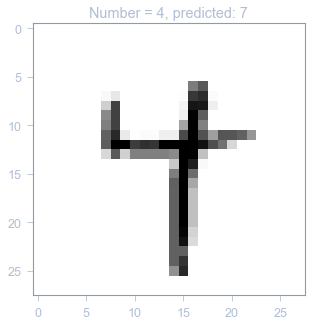

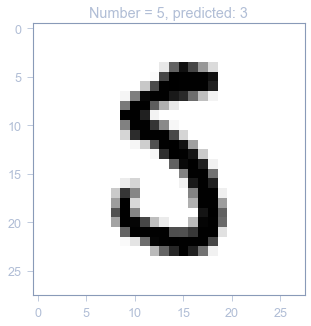

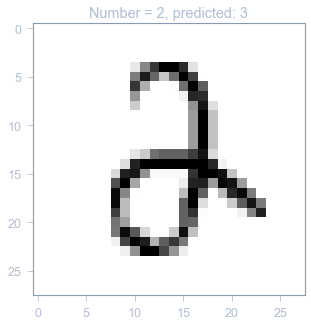

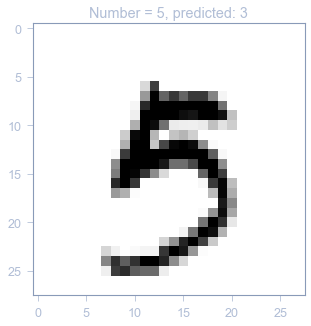

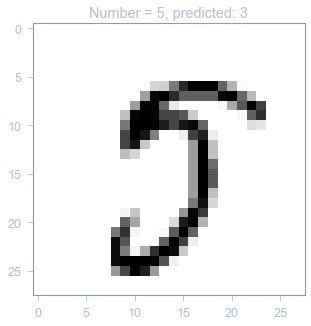

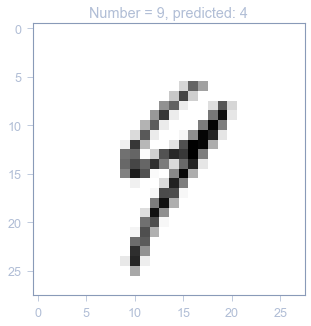

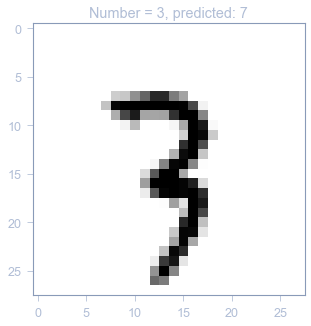

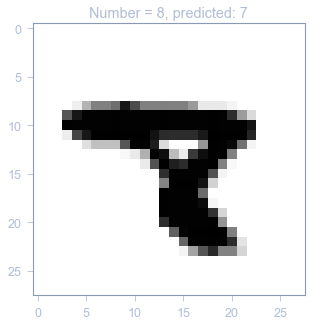

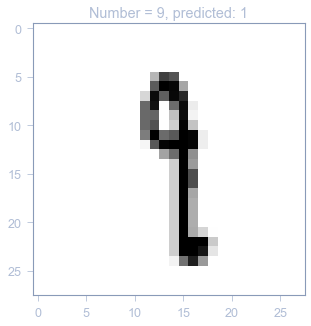

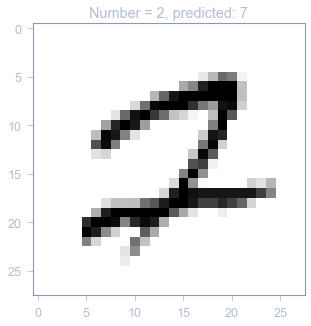

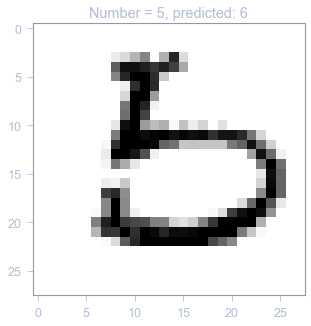

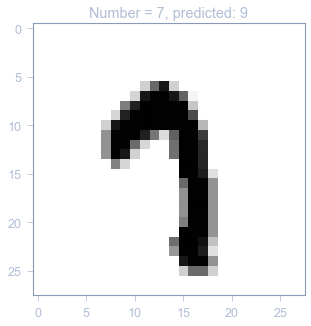

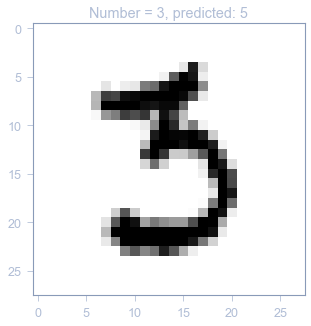

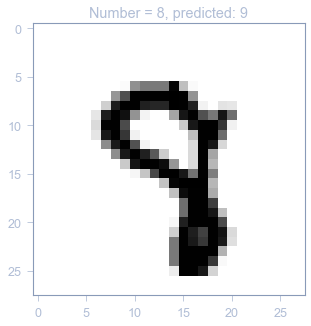

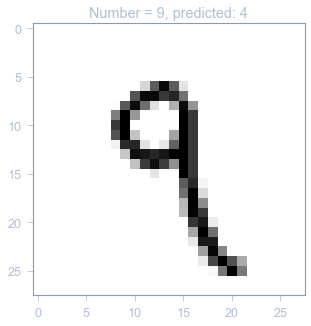

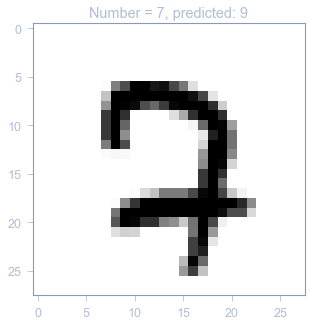

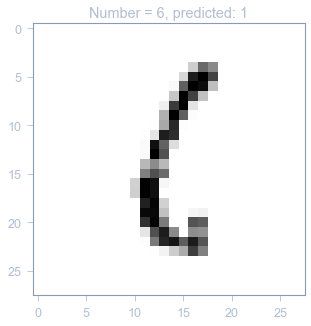

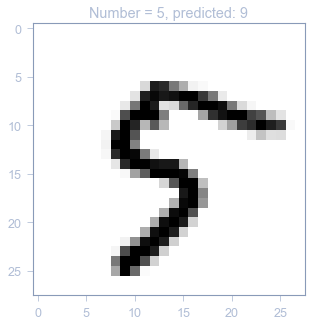

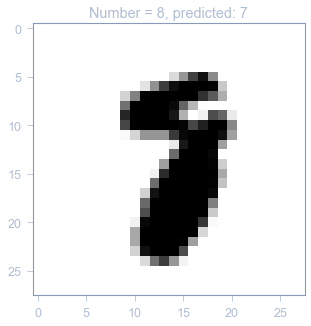

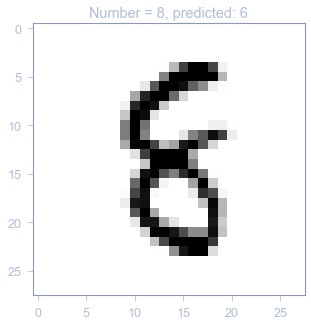

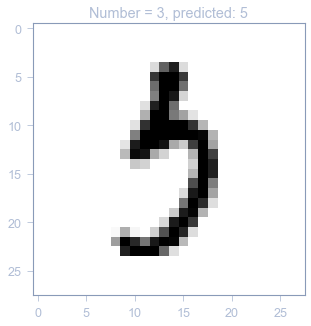

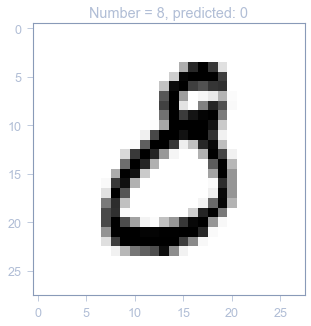

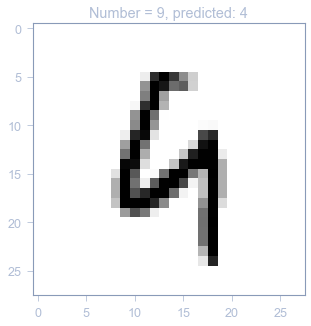

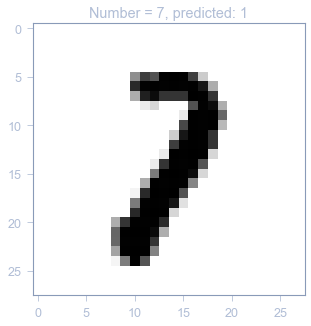

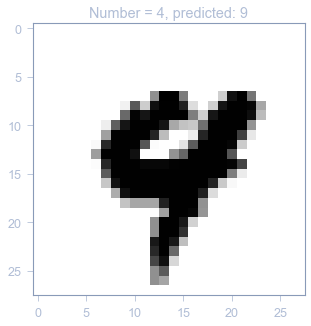

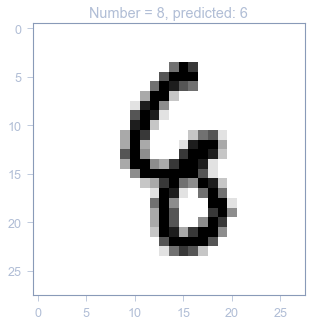

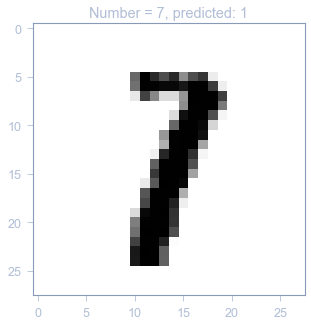

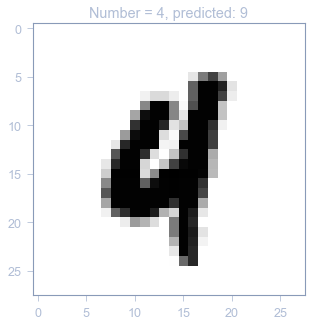

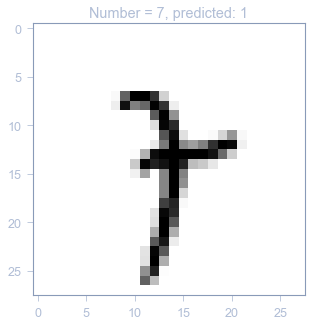

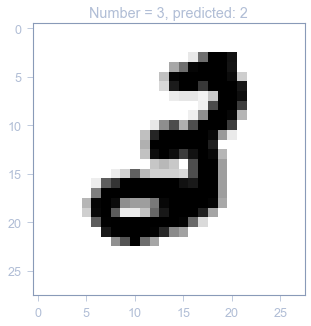

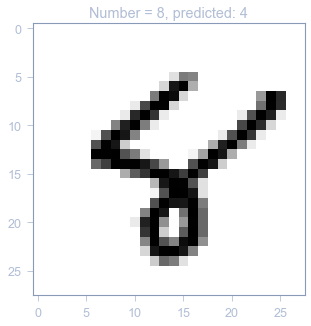

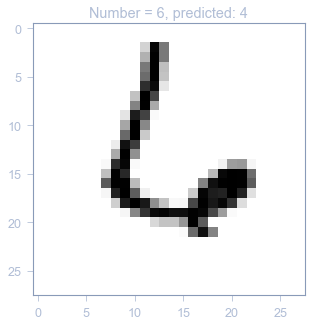

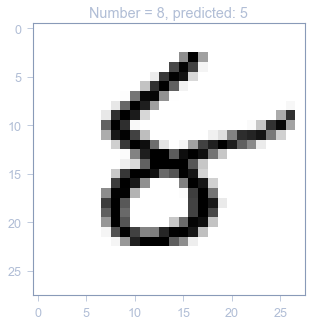

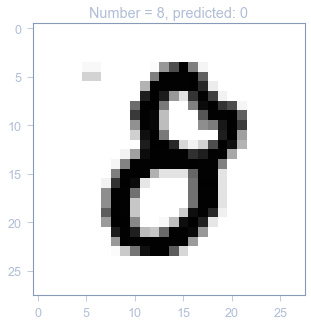

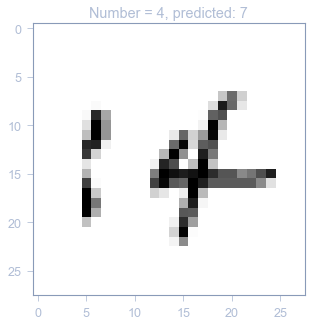

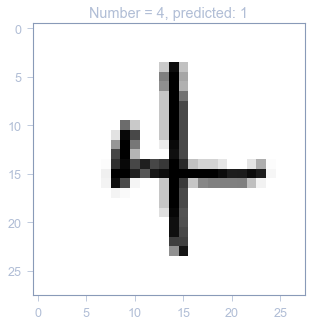

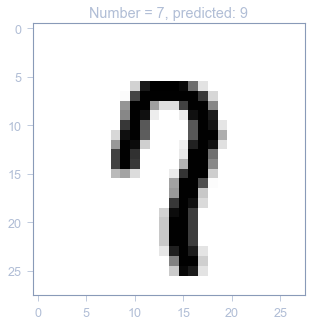

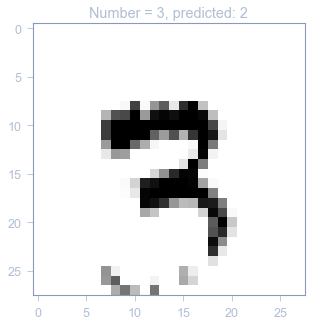

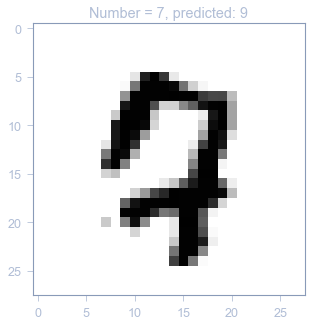

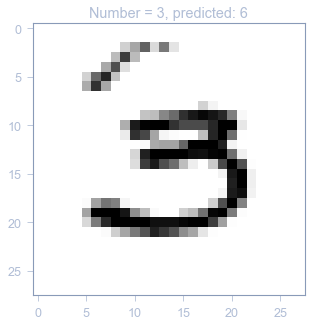

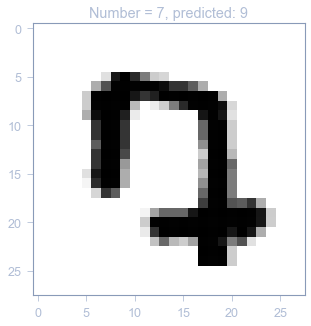

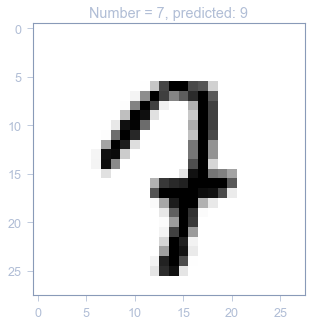

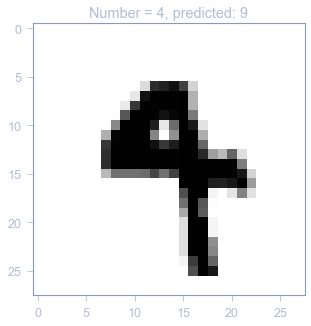

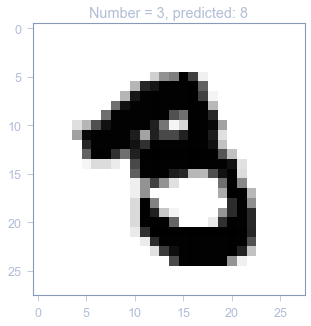

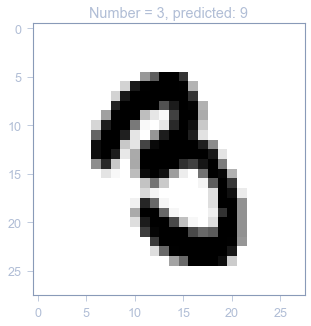

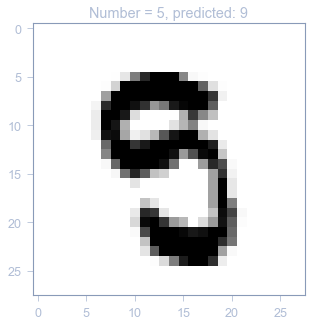

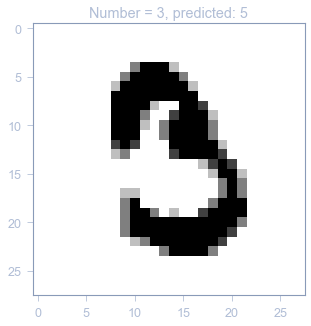

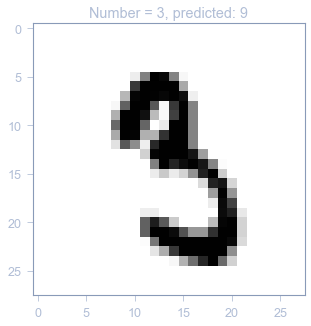

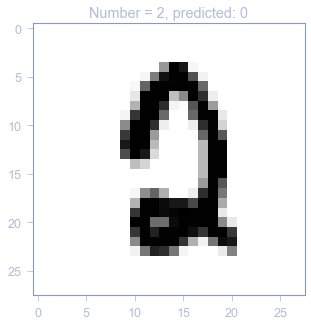

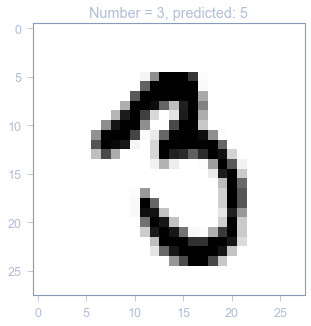

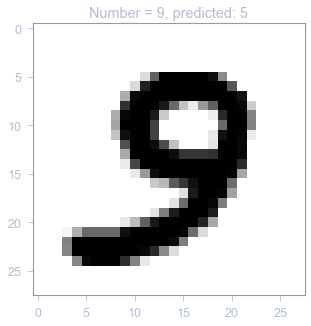

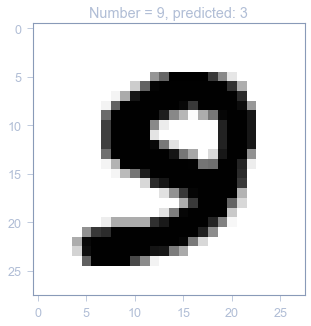

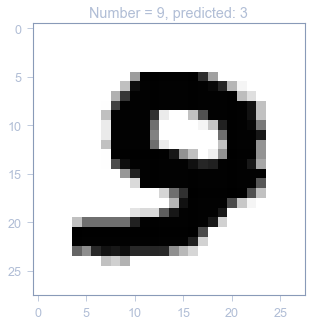

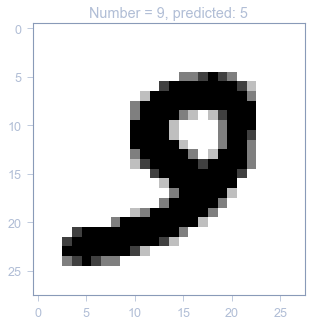

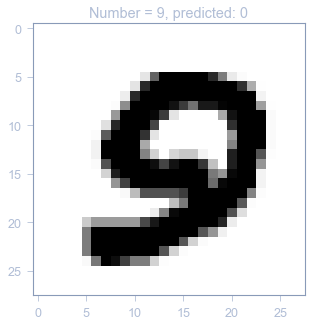

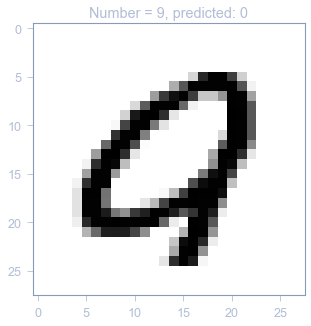

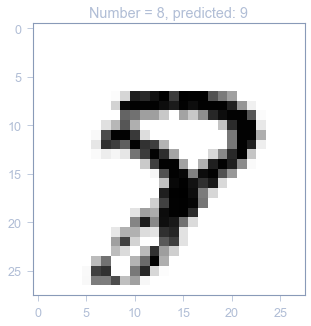

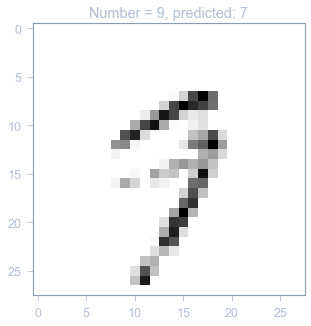

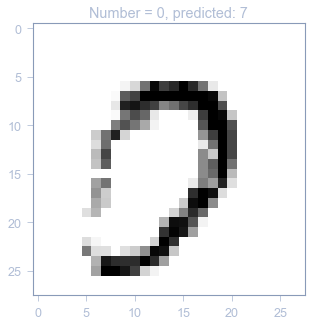

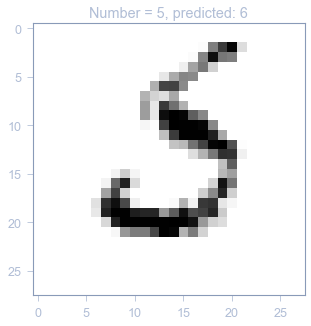

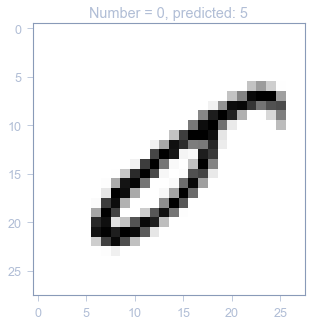

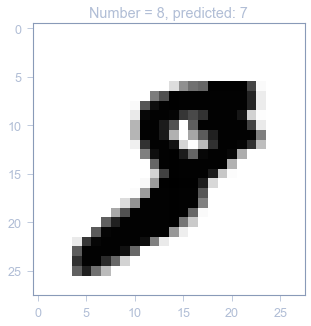

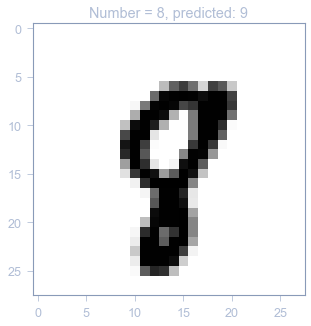

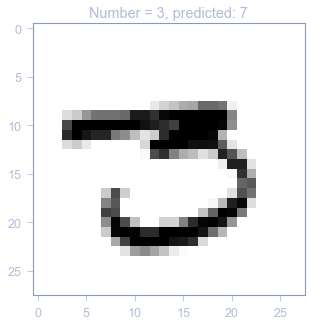

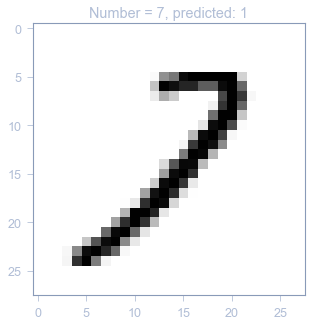

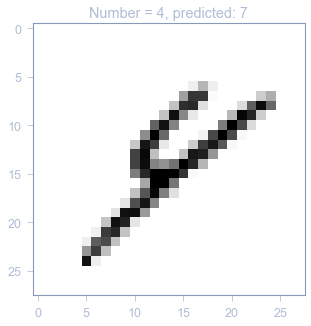

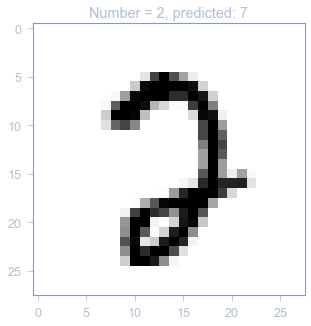

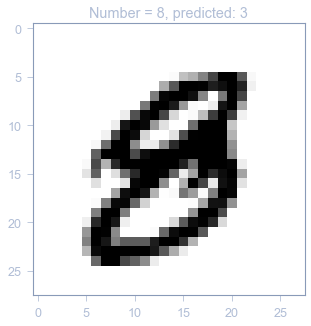

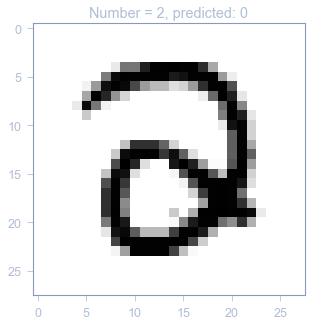

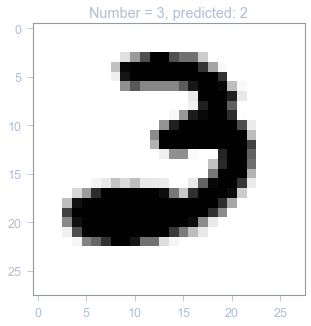

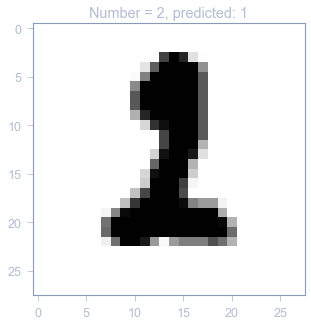

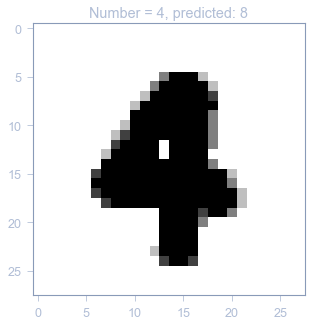

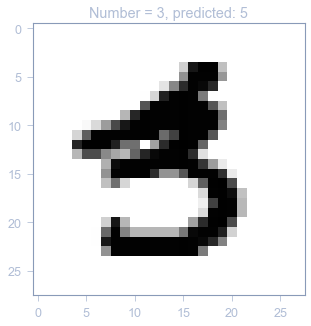

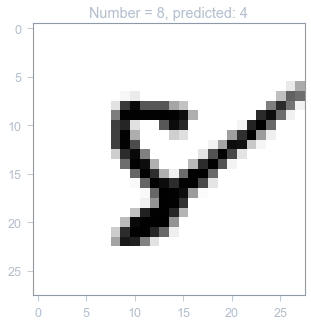

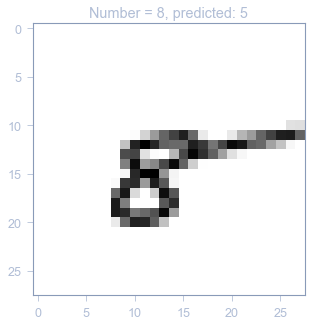

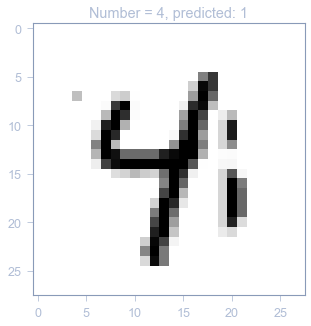

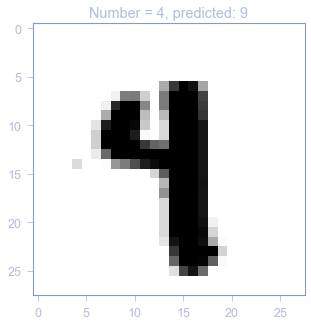

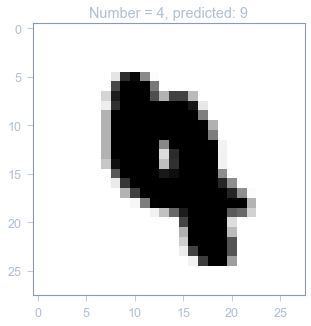

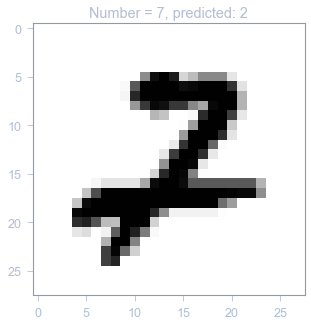

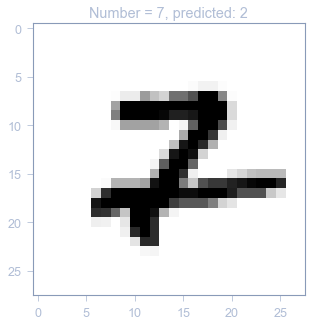

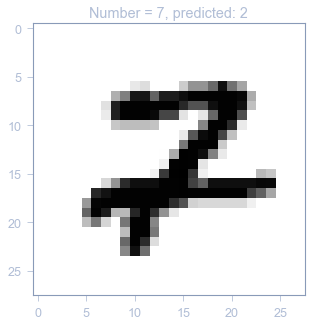

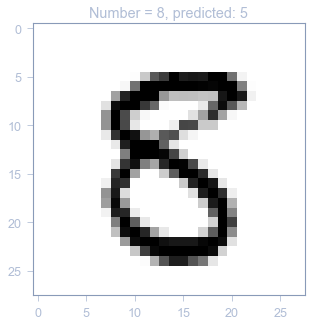

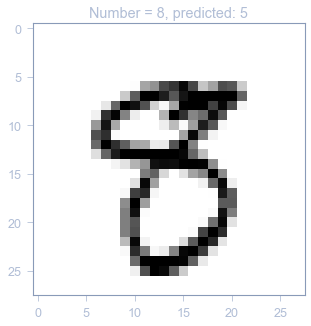

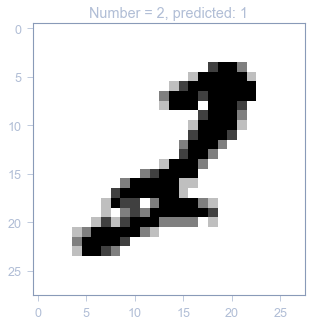

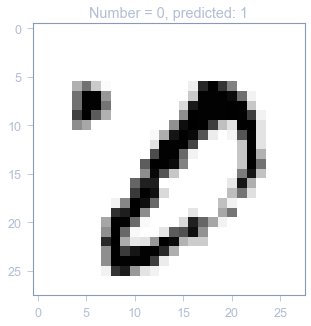

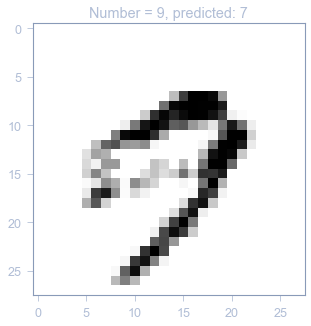

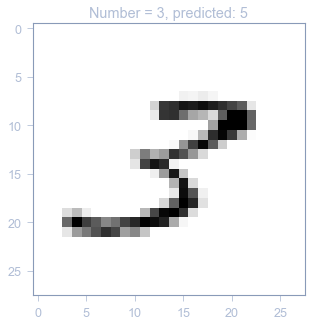

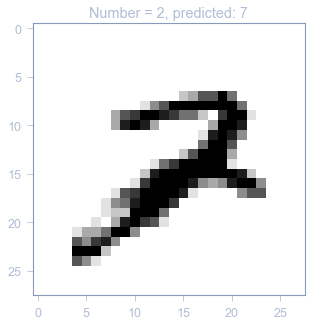

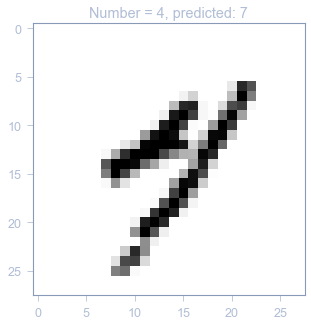

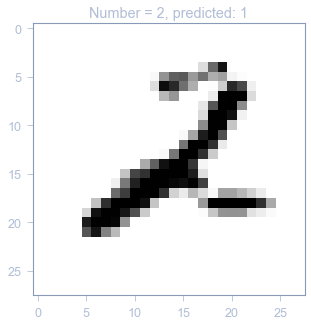

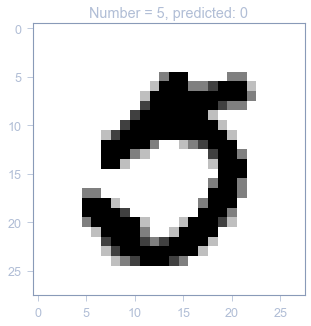

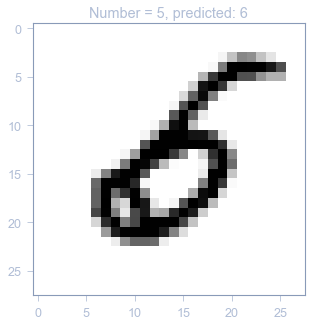

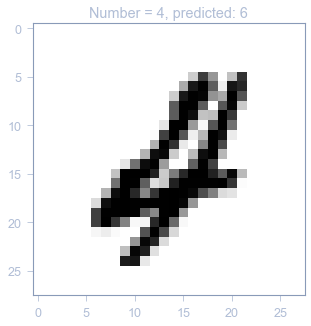

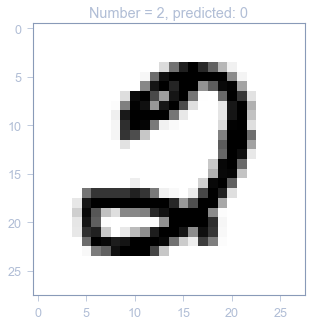

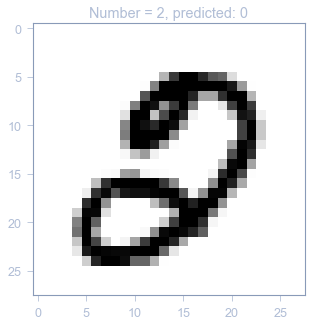

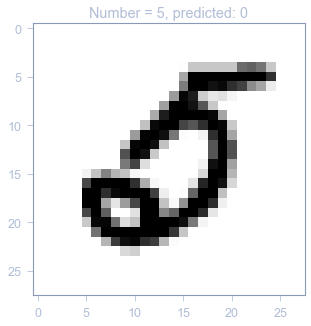

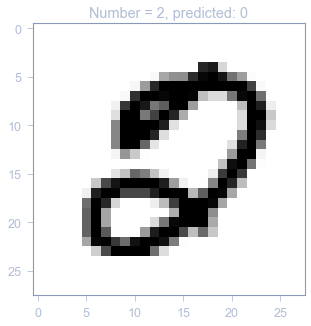

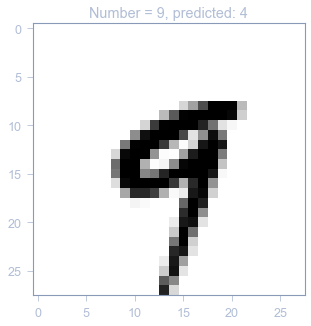

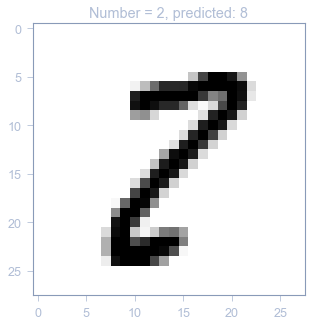

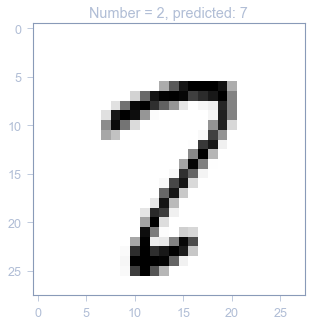

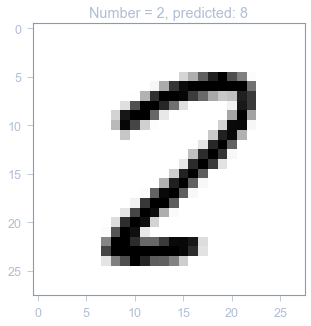

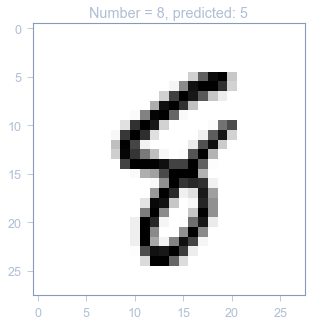

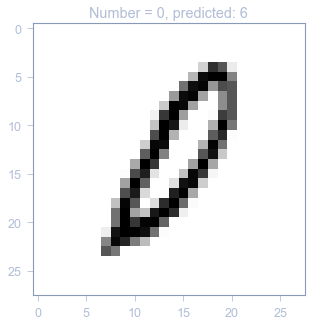

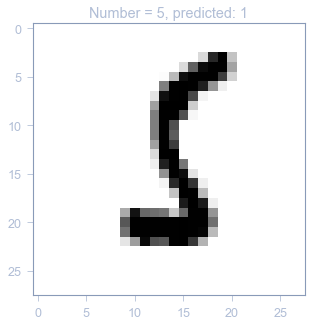

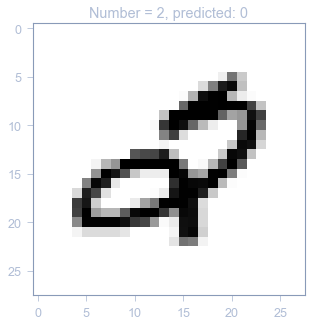

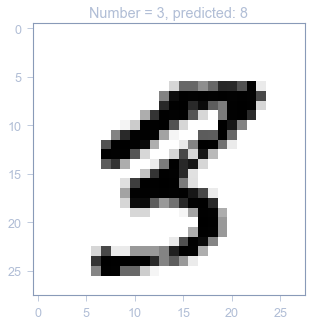

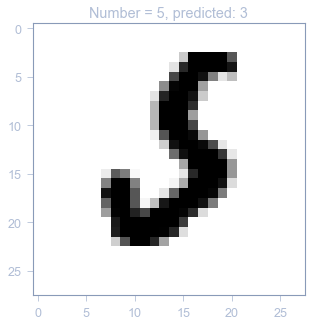

In [16]:
wrongPredictionCounter = 0
for i in range(len(y_test)):
    if y_test[i] != y_knn_pred[i]:
        wrongPredictionCounter += 1
        plt.imshow(X_test[i].reshape(28, 28), cmap='binary')
        plt.title("Number = " + str(y_test[i]) + ", predicted: " + str(y_knn_pred[i]))
        plt.show()

In [17]:
wrongPredictionCounter

283

In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_knn_pred)


0.9717